In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/NLP-movie-review.csv')

In [ ]:
df.head()  ## First 5 observations

,review,reaction
0,Service is friendly and inviting.,1
1,Awesome service and food.,1
2,Waitress was a little slow in service.,0
3,"Come hungry, leave happy and stuffed!",1
4,Horrible - don't waste your time and money.,0


In [ ]:
df.tail()

,review,reaction
995,This was my first time and I can't wait until ...,1
996,Great service and food.,1
997,I paid the bill but did not tip because I felt...,0
998,The one down note is the ventilation could use...,0
999,I really enjoyed eating here.,1


In [ ]:
print('There are {} rows and {} columns in the dataset'.format(df.shape[0],df.shape[1]))

There are 1000 rows and 2 columns in the dataset


# **Manipulating the data as required**

In the reaction column the reaction is given values of 0 and 1 and for easy interpretation let us manipulate the value of 1 as positive and 0 as negative as shown below.

In [ ]:
df['reaction'].replace(to_replace=1,value='positive',inplace=True)
df['reaction'].replace(to_replace=0,value='negative',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


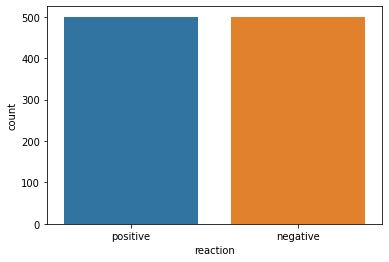

In [ ]:
sns.countplot(df.reaction)
plt.show()

# **Regex operations on the textual data**

Regex is one of the modules that python offers to analyze the test data for some regular string expressions. Using Regex the required characters can be filtered out from the textual data through suitable preprocessing and using the sub() module of Regex all the required patterns of the textual data can be fetched.

In [ ]:
import re

Using Regex to extract only the required text from the data

In [ ]:
text_doc = df.review.apply(lambda x: re.sub("[^a-zA-Z]"," ",x))

Here basically a lambda function is written to extract only alphabets in the textual data and filter out all other characters such as #,@, and many more which are most commonly used in textual data. So here only alphabets a-z and A-Z alphabets are extracted from the text data.

In [ ]:
print('Data before regex operation {}'.format(df['review'][4]))
print()
print('Data after regex operation {}'.format(text_doc[4]))

Data before regex operation Horrible - don't waste your time and money.

Data after regex operation Horrible   don t waste your time and money 


So here after the Regex operation, we can observe that the (-) character is removed from the original text data.

# **Tokenization and lower case conversion**

Tokenization is the process of splitting the entire textual data into small pieces of text called tokens wherein each of the first columns of the textual data will be coveted to a list of tokens split with a comma (,) operator.

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer

#  Creating a tokenization instance

In [ ]:
tokenize=RegexpTokenizer('\w+')

Here in the tokenization instance being created (\w+) instance is being used to match one or more occurring words which may either be a-z or A-Z. So now using this instance let us see how to perform tokenization.

In [ ]:
#Performing Tokenization
tokens=text_doc.apply(lambda x:tokenize.tokenize(x))

A lambda function is used to perform tokenization on the entire textual data by calling the inbuilt function of RegexpTokenizer. Let us visualize the tokenized data using a print statement.

In [ ]:
print(tokens[:5])

0               [Service, is, friendly, and, inviting]
1                        [Awesome, service, and, food]
2        [Waitress, was, a, little, slow, in, service]
3           [Come, hungry, leave, happy, and, stuffed]
4    [Horrible, don, t, waste, your, time, and, money]
Name: review, dtype: object


# Lower case conversion of the tokenized data

In [ ]:
lower=[list(map(lambda x:x.lower(),l)) for l in tokens]

Here a lambda function is used to convert all the tokens in the dataset to lower case and the converted document can be verified through a print statement.

In [ ]:
print('Original text document: {}'.format(text_doc[1]))
print()
print('Lower case converted document: {}'.format(lower[1]))

Original text document: Awesome service and food 

Lower case converted document: ['awesome', 'service', 'and', 'food']


# **Stopword removal**

Stopwords are also termed as common words that would occur in textual data and it is very important to remove them in the process of text analysis or preprocessing as it would give more weightage to the actual text data utilized at that particular instance.

In [ ]:
#Downloading the stopwords from the nltk package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

From the nltk package, the corpus library is utilized to retrieve the stopwords library.

In [ ]:
# Importing the required library for removing stopwords
from nltk.corpus import stopwords

In [ ]:
#Creating an instance for common stopwords in the English language
stopwords=nltk.corpus.stopwords.words('english')

Now let us visualize the top 20 stopwords present in the nltk library through slicing operations.

In [ ]:
stopwords[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [ ]:
# Removing the word not present in the list of nltk common stopwords
stopwords.remove('not')

The stopwords in the NLTK module are removed by using the simple remove() function of the list.

In [ ]:
#Handling the stopwords
stop=[]
for line in lower:
 words=[]
 for word in line:
   if word not in stopwords:
     words.append(word)
 stop.append(words)

Here an empty list named stop is created to append the words that are not present in the standard list of the nltk module where the stopwords will be removed from the lower case converted data.

In [ ]:
# Analyzing the data before and after stopword removal
print('Text column with stopword',lower[-1])
print()
print('Text column after removing stopword',stop[-1])

Text column with stopword ['i', 'really', 'enjoyed', 'eating', 'here']

Text column after removing stopword ['really', 'enjoyed', 'eating']


# **Stemming the textual data**

Stemming is the process of just removing the last characters of each of the lower case converted characters using some standard NLTK packages. Here let us see how to use the LanCasterStemmer to perform the stemming operation.

In [ ]:
# Importing the stemming package from NLTK
from nltk.stem import LancasterStemmer

Here an empty list named stem is created and the stem function of LanCasterStemmer is used to chop off the last occurring character and the stem word will be appended to the empty list being created.

In [ ]:
#Performing the stemming operation
stem=[]
for line in stop:
 words=[]
 for word in line:
   words.append(LancasterStemmer().stem(word))
 stem.append(words)

In [ ]:
print('Text column without stemming : {}'.format(lower[1]))
print()
print('Text column after stemming : {}'.format(stem[1]))

Text column without stemming : ['awesome', 'service', 'and', 'food']

Text column after stemming : ['awesom', 'serv', 'food']


Here in the output, we can see that after applying stemming to the lower case converted test data that words like service are converted to serve and awesome to awesom

# **Lemmatization**

Lemmatization is one such process of text analytics where the context or the meaning of each of the lower case converted tokens is considered and the lemmatization process occurs. So let us see how to utilize the  WordNetLemmatizer of the NLTK module to implement lemmatization.

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
# Creating a lemmatization instance
word_net_lem=WordNetLemmatizer()

 Here an empty list is created to append the lemmatized word by the lemmatization instance by using the inbuilt function of lemmatization named lemmatize as shown below.

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
lem=[]
for line in stop:
 words=[]
 for word in line:
   words.append(word_net_lem.lemmatize(word))
 lem.append(words)

In [ ]:
print('Original data is : {}'.format(lower[-1]))
print()
print('Stemmed data is : {}'.format(stem[-1]))
print()
print('Lemmatized data is : {}'.format(lem[-1]))

Original data is : ['i', 'really', 'enjoyed', 'eating', 'here']

Stemmed data is : ['real', 'enjoy', 'eat']

Lemmatized data is : ['really', 'enjoyed', 'eating']


Now let us use the lemmatized data and create a new column in our original dataset as shown below.

In [ ]:
clean_text = []
for i in lem:
 clean_text.append(' '.join(i))
#Here an empty list is created to join each outcome of the lemmatization instance and later integrate with the data frame as shown below.
df['Cleaned_text']=clean_text
#Now let us visualize the top 5 entries of the data.
df.head(5)

,review,reaction,Cleaned_text
0,Service is friendly and inviting.,positive,service friendly inviting
1,Awesome service and food.,positive,awesome service food
2,Waitress was a little slow in service.,negative,waitress little slow service
3,"Come hungry, leave happy and stuffed!",positive,come hungry leave happy stuffed
4,Horrible - don't waste your time and money.,negative,horrible waste time money


Here we can see that the lemmatization output for each entry of the original data is appended under the column named Cleaned_text

# **Visualizing the Cleaned textual data with WordClouds**

In [ ]:
from wordcloud import WordCloud

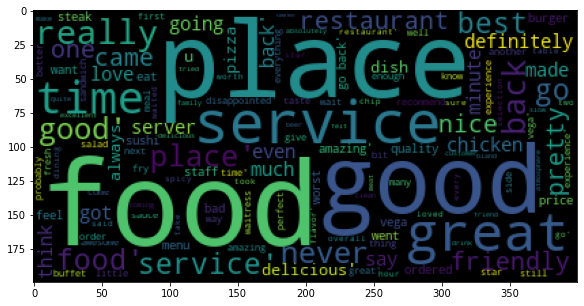

In [ ]:
# Generating word cloud for the textual data
## Creating a word cloud instance
wc=WordCloud().generate(str(clean_text))
## Plotting the word cloud
plt.figure(figsize=(15,5))
plt.imshow(wc)
plt.show()

Here the Cleaned_text data column is used for WordCloud Visual and we can clearly see from the visual that words like the place, service, food, and good are used more frequently and words like best, service, and friendly are used very rarely.

Now let us try to obtain a wordcloud to visualize the most frequently occurring word in positive reviews where in the text document obtained after lemmatization is used to filter out the reviews.

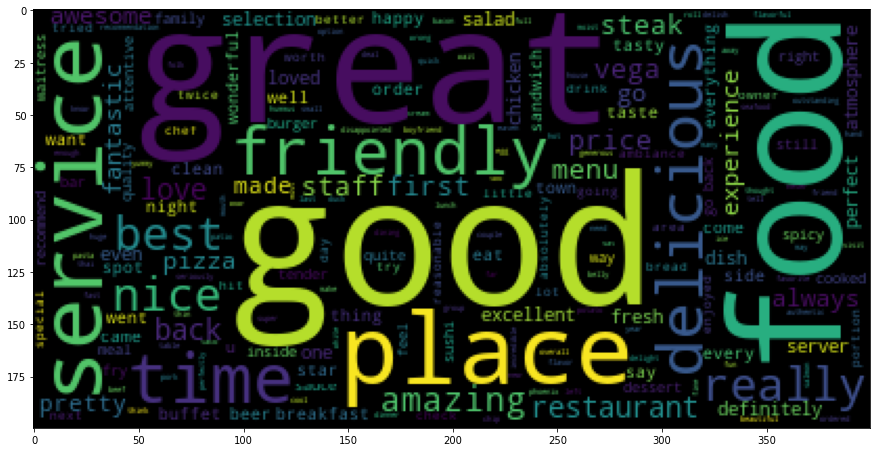

In [ ]:
plt.figure(figsize = (15,15))
wc = WordCloud().generate(" ".join(df[df.reaction == 'positive'].Cleaned_text))
plt.imshow(wc)
plt.show()

This is a WordCloud obtained for a positive reaction from the data and in the words of the positive review like good, great, food, and service are used frequently and words like time, really, friendly and amazing are used only a few times.

In a similar way let us try to visualize the frequently occurring word in negative reviews where the lemmatized data will be filtered out for negative reviews as shown below.

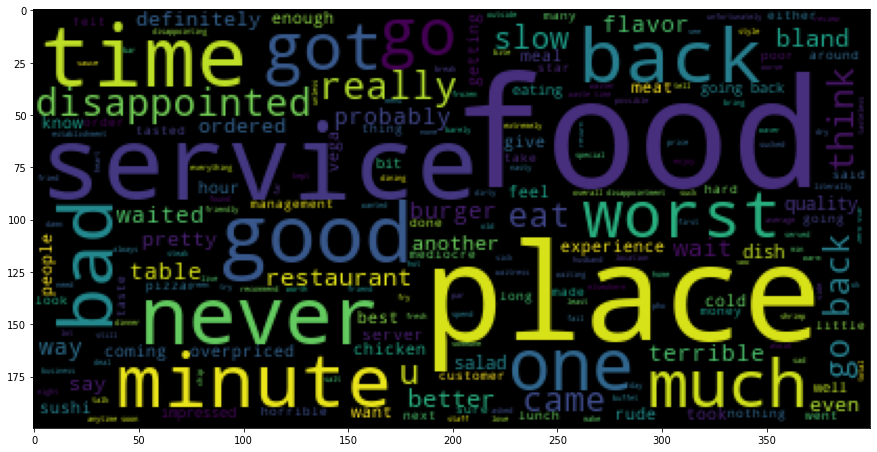

In [ ]:
plt.figure(figsize = (15,15))
wc = WordCloud().generate(" ".join(df[df.reaction == 'negative'].Cleaned_text))
plt.imshow(wc)
plt.show()

This is a WordCloud obtained for negative reviews and we can see that words like food, never, service, and place are occurring frequently and words like worst, got, bad and much are occurring a very few times.

# **CountVectorizer for feature extraction**

Countvectorizer is the process of converting textual data to numerical data, wherein it is a process similar to encoding in Machine Learning. Now let us see how to convert the textual data into numerical features using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the data into train and test
train_doc,test_doc=train_test_split(df['Cleaned_text'],test_size=0.2,random_state=42)

In [ ]:
#Creating a CountVectorizer instance
cv=CountVectorizer(min_df=2,max_df=5).fit(train_doc)

In [ ]:
#Analyzing the numerical features through a dataframe
#Here the feature names are analyzed in the form of a data frame to analyze how the features are transformed to numerical features.
x  = cv.fit_transform(df.Cleaned_text.values).toarray()
x  = pd.DataFrame(x,columns=cv.get_feature_names())
x

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,acknowledged,actually,added,ago,almost,although,ambience,amount,anyone,anything,...,worker,world,worse,wow,wrap,wrong,year,yet,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In this output, we can see that for each of the tokens of the data the encoded output by the CountVectorizer.

# **TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

 A TF-IDF instance is created by declaring the stopwords to English as shown below.

In [ ]:
#Creating a tf-idf instance
tfidf_vec=TfidfVectorizer(stop_words="english")

In [ ]:
#Analyzing through a dataframe 
tfidf_df = tfidf_vec.fit_transform(df.Cleaned_text.values)
tfidf_df= pd.DataFrame(tfidf_df.todense(),columns=tfidf_vec.get_feature_names())
tfidf_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,absolute,absolutely,absolutley,accident,accommodation,accomodate,accordingly,accountant,ache,acknowledged,...,yeah,year,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In this output, we can see for each of the token's that how frequently certain characters occur over the entire corpus.

# **Analyzing a grams for common words**

# Unigram text analysis

In [ ]:
def get_top_text_ngrams(corpus, n, g):
   vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
   bag_of_words = vec.transform(corpus)
   sum_words = bag_of_words.sum(axis=0)
   words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
   words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
   return words_freq[:n]

Here the plotly module is utilized to obtain plots for interpretation and the gram factor is mentioned as 1.

In [ ]:
import plotly.express as px
common_uni = get_top_text_ngrams(df.Cleaned_text,20,1)
common_uni = dict(common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(common_uni.keys())
temp["Count"] = list(common_uni.values())
fig1 = px.bar(temp, x="Count", y="Common_words", title='Common Words in Unigram analysis', orientation='h',
            width=700, height=700,color='Common_words')
fig1.show()

In the unigram analysis, we can see that words like food occur more commonly and words like nice occur very less number of times.

# **Bigram text analysis**

In [ ]:
common_big = get_top_text_ngrams(df.Cleaned_text,20,2)
common_big = dict(common_big)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(common_big.keys())
temp["Count"] = list(common_big.values())
fig2 = px.bar(temp, x="Count", y="Common_words", title='Common Words in Bigram analysis', orientation='h',
            width=700, height=700,color='Common_words')
fig2.show()

In the bigram analysis, we can see that words like go back occur more frequently and words like never ever are used less often

# Trigram text analysis

In [ ]:
common_tri = get_top_text_ngrams(df.Cleaned_text,20,3)
common_tri = dict(common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(common_tri.keys())
temp["Count"] = list(common_tri.values())
fig3 = px.bar(temp, x="Count", y="Common_words", title='Common Words in Trigram analysis', orientation='h',
            width=700, height=700,color='Common_words')
fig3.show()

In the trigram analysis, we can see that words like would not recommend occurring more frequently and words like would much rather are used less often.